In [343]:
import pandas as pd

In [344]:
Annual_P_L_1_final = pd.read_csv("/home/user/Downloads/data_01_07_2024/Annual_P_L_1_final.csv")

In [345]:
Annual_P_L_1_final.head()

,Name,BSE Code,NSE Code,Industry,Current Price,Sales,OPM,Profit after tax,Return on capital employed,EPS,...,Extraordinary items preceding year,Net Profit preceding year,Dividend preceding year,OPM preceding year,NPM preceding year,EPS preceding year,Sales preceding 12months,Net profit preceding 12months,Market Capitalization,join_key
0,20 Microns,533022.0,20MICRONS,Mining / Minerals / Metals,224.55,777.49,13.59,57.38,21.70,15.89,...,0.00,41.96,2.65,12.23,5.98,11.85,738.43,51.80,792.37,533022.0_20MICRONS
1,21st Cent. Mgmt.,526921.0,21STCENMGM,Finance & Investments,70.44,34.92,94.27,32.23,73.00,30.70,...,0.00,-15.58,0.00,-115.06,NaN,-14.84,11.94,9.93,73.96,526921.0_21STCENMGM
2,360 ONE,542772.0,360ONE,Finance & Investments,1009.40,2920.91,58.37,804.18,14.47,22.41,...,0.01,657.89,2457.09,62.77,31.99,18.48,2245.61,717.01,36627.84,542772.0_360ONE
3,3B Blackbio,532067.0,__NA__,Healthcare,1182.00,74.12,44.50,32.10,20.95,38.13,...,0.00,25.94,1.87,47.12,41.95,34.55,69.24,28.49,1014.49,532067.0___NA__
4,3C IT Solutions,544190.0,__NA__,Computers - Software - Medium / Small,44.01,61.93,5.17,1.14,25.63,31.67,...,0.00,1.11,0.00,4.21,1.66,1110.00,NaN,NaN,26.50,544190.0___NA__


In [346]:
Annual_P_L_1_final.columns

Index(['Name', 'BSE Code', 'NSE Code', 'Industry', 'Current Price', 'Sales',
       'OPM', 'Profit after tax', 'Return on capital employed', 'EPS',
       'Change in promoter holding', 'Sales last year',
       'Operating profit last year', 'Other income last year',
       'EBIDT last year', 'Depreciation last year', 'EBIT last year',
       'Interest last year', 'Profit before tax last year', 'Tax last year',
       'Profit after tax last year', 'Extraordinary items last year',
       'Net Profit last year', 'Dividend last year', 'Material cost last year',
       'Employee cost last year', 'OPM last year', 'NPM last year',
       'Operating profit', 'Interest', 'Depreciation', 'EPS last year', 'EBIT',
       'Net profit', 'Current Tax', 'Tax', 'Other income',
       'Last annual result date', 'Sales preceding year',
       'Operating profit preceding year', 'Other income preceding year',
       'EBIDT preceding year', 'Depreciation preceding year',
       'EBIT preceding year', 'Inter

In [347]:
Annual_P_L_1_final.shape

(4668, 58)

In [348]:
Annual_P_L_1_final['EPS'].min(),Annual_P_L_1_final['EPS'].max()

(-486.41, 8787.0)

EPS Min: -486.41, EPS Max: 8787.0


/tmp/ipykernel_3026726/518010155.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Annual_P_L_1_final['EPS'], shade=True, color="b")


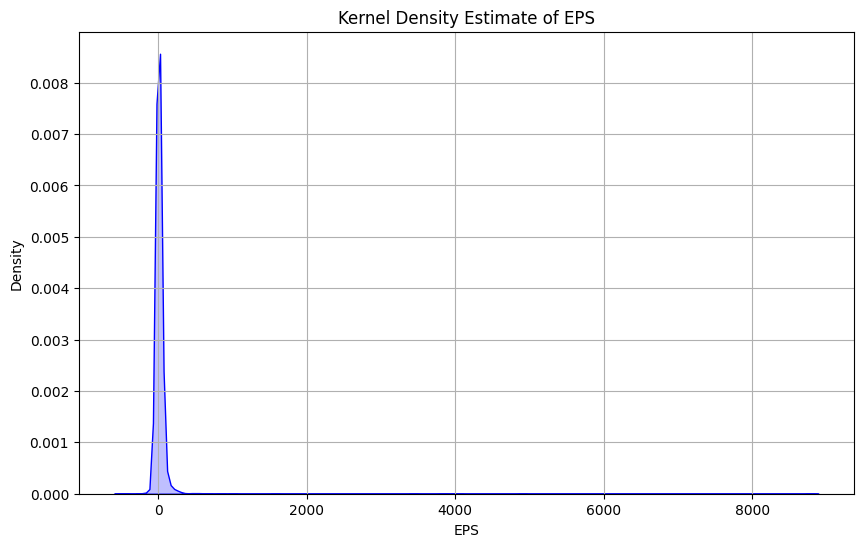

In [349]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Annual_P_L_1_final is your DataFrame

# Get the min and max of EPS
eps_min = Annual_P_L_1_final['EPS'].min()
eps_max = Annual_P_L_1_final['EPS'].max()

print(f"EPS Min: {eps_min}, EPS Max: {eps_max}")

# Plot the KDE of EPS
plt.figure(figsize=(10, 6))
sns.kdeplot(Annual_P_L_1_final['EPS'], shade=True, color="b")
plt.title('Kernel Density Estimate of EPS')
plt.xlabel('EPS')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [350]:
Annual_P_L_1_final['EPS'].value_counts().nlargest(20)

EPS
 0.00    42
 0.01    28
 0.05    25
 0.03    25
 0.02    25
 0.07    24
 0.04    23
 0.14    20
 0.13    18
 0.06    15
 0.10    15
-0.09    15
 0.11    15
 0.12    14
-0.03    13
 0.26    13
-0.01    13
-0.07    12
 0.18    11
 0.34    11
Name: count, dtype: int64

In [351]:
Annual_P_L_1_final['Net profit'].value_counts()

Net profit
 0.02       24
 0.06       20
 0.00       19
 0.03       16
 0.01       16
            ..
 1574.08     1
-4.32        1
 41.32       1
 311.67      1
 3.89        1
Name: count, Length: 3120, dtype: int64

In [352]:
Annual_P_L_1_final['Return on capital employed'].min(),Annual_P_L_1_final['Return on capital employed'].max(),Annual_P_L_1_final['Return on capital employed'].median()

(-1535.0, 18600.0, 9.6)

In [353]:
filter_conditions = (
    (Annual_P_L_1_final['EPS'] > 10) &  # EPS greater than 10
    (Annual_P_L_1_final['Net profit'] > 0) &  # Net profit should be positive
    (Annual_P_L_1_final['Net profit'] > Annual_P_L_1_final['Net Profit last year']) & 
    (Annual_P_L_1_final['OPM'] > 10) &  # Operating Profit Margin greater than 10%
    (Annual_P_L_1_final['Return on capital employed'] > 15) &  # ROCE greater than 15%
    (Annual_P_L_1_final['Sales'] > Annual_P_L_1_final['Sales last year']) &  # Sales should be higher than last year
    (Annual_P_L_1_final['EPS'] > Annual_P_L_1_final['EPS last year']) &  # EPS should be higher than last year
    (Annual_P_L_1_final['Market Capitalization'] > 100) &  # Market Capitalization greater than 100 crore
    (Annual_P_L_1_final['Change in promoter holding'] >= 0)  # No decrease in promoter holding
)
good_companies1 = Annual_P_L_1_final[filter_conditions]

In [354]:
good_companies1.shape

(9, 58)

In [355]:
good_companies1

,Name,BSE Code,NSE Code,Industry,Current Price,Sales,OPM,Profit after tax,Return on capital employed,EPS,...,Extraordinary items preceding year,Net Profit preceding year,Dividend preceding year,OPM preceding year,NPM preceding year,EPS preceding year,Sales preceding 12months,Net profit preceding 12months,Market Capitalization,join_key
13,A B B,500002.0,ABB,Electric Equipment,8556.00,11115.67,15.92,1462.61,30.69,68.73,...,326.33,1016.23,116.54,11.30,8.92,47.96,10446.52,1242.05,181308.81,500002.0_ABB
1116,Elantas Beck,500123.0,__NA__,Chemicals,11550.05,687.03,21.48,144.16,27.67,181.84,...,10.88,97.78,3.96,17.09,13.89,123.34,679.89,137.30,9159.19,500123.0___NA__
1269,Foseco India,500150.0,FOSECOIND,Chemicals,4208.00,489.01,15.10,64.89,31.71,116.79,...,-0.43,45.97,25.56,15.58,11.38,71.98,477.41,72.98,2688.90,500150.0_FOSECOIND
1391,Gillette India,507815.0,GILLETTE,Personal Care - Multinational,7459.15,2607.19,22.88,387.48,52.01,118.91,...,-0.38,289.33,224.87,21.40,12.84,88.79,2545.52,391.09,24309.37,507815.0_GILLETTE
2214,KSB,500249.0,KSB,Pumps,4805.40,2301.80,12.92,212.40,23.29,61.02,...,1.35,182.74,52.22,13.54,9.97,52.50,2247.20,208.70,16727.59,500249.0_KSB
2885,P & G Hygiene,500459.0,PGHH,Personal Care - Multinational,16666.55,4126.48,25.85,745.20,100.63,229.57,...,-1.76,575.75,519.36,21.32,14.79,177.37,4007.40,755.85,54100.86,500459.0_PGHH
3559,Schaeffler India,505790.0,SCHAEFFLER,Bearings,4639.80,7381.73,18.25,920.76,26.72,58.69,...,14.38,879.21,375.12,18.88,12.65,56.25,7226.13,909.03,72521.76,505790.0_SCHAEFFLER
3741,Siemens,500550.0,SIEMENS,Electric Equipment,7802.00,19604.20,12.49,2317.50,20.66,65.08,...,304.30,1530.80,356.00,11.02,10.20,42.99,18755.60,1937.10,277845.05,500550.0_SIEMENS
4454,Vesuvius India,520113.0,VESUVIUS,Refractories / Intermediates,5179.90,1688.57,19.35,238.37,26.09,117.45,...,0.00,116.79,16.75,12.27,8.70,57.54,1603.13,212.94,10515.18,520113.0_VESUVIUS


filter_conditions = (
    (df['EPS'] > 10) &  # EPS greater than 10
    (df['Net profit'] > 0) &  # Net profit should be positive
    (df['Net Profit Margin'] > 10) &  # Net Profit Margin greater than 10%
    (df['Operating Profit Margin'] > 10) &  # Operating Profit Margin greater than 10%
    (df['Return on capital employed'] > 15) &  # ROCE greater than 15%
    (df['Sales'] > df['Sales last year']) &  # Sales should be higher than last year
    (df['EPS'] > df['EPS last year']) &  # EPS should be higher than last year
    (df['Interest'] < df['EBIT']) &  # Interest should be less than EBIT
    (df['Market Capitalization'] > 1000) &  # Market Capitalization greater than 1000 crore
    (df['Change in promoter holding'] >= 0)  # No decrease in promoter holding
)


In [356]:
Annual_P_L_2_final= pd.read_csv("/home/user/Downloads/data_01_07_2024/Annual_P_L_2_final.csv")

In [357]:
Annual_P_L_2_final.columns

Index(['Name', 'BSE Code', 'NSE Code', 'Industry', 'Current Price',
       'Sales growth 3Years', 'Sales growth 5Years', 'Profit growth 3Years',
       'Profit growth 5Years', 'Sales growth 10years median',
       'Sales growth 5years median', 'Sales growth 7Years',
       'Sales growth 10Years', 'EBIDT growth 3Years', 'EBIDT growth 5Years',
       'EBIDT growth 7Years', 'EBIDT growth 10Years', 'EPS growth 3Years',
       'EPS growth 5Years', 'EPS growth 7Years', 'EPS growth 10Years',
       'Profit growth 7Years', 'Profit growth 10Years',
       'Change in promoter holding 3Years', 'Average Earnings 5Year',
       'Average Earnings 10Year', 'Average EBIT 5Year', 'Average EBIT 10Year',
       'Market Capitalization', 'join_key'],
      dtype='object')

In [358]:
Annual_P_L_2_final.shape

(4668, 30)

In [359]:
Annual_P_L_2_final.head()

,Name,BSE Code,NSE Code,Industry,Current Price,Sales growth 3Years,Sales growth 5Years,Profit growth 3Years,Profit growth 5Years,Sales growth 10years median,...,EPS growth 10Years,Profit growth 7Years,Profit growth 10Years,Change in promoter holding 3Years,Average Earnings 5Year,Average Earnings 10Year,Average EBIT 5Year,Average EBIT 10Year,Market Capitalization,join_key
0,20 Microns,533022.0,20MICRONS,Mining / Minerals / Metals,224.65,17.15,10.14,35.20,17.97,9.98,...,48.07,20.05,48.68,0.12,36.19,24.91,68.28,56.31,792.72,533022.0_20MICRONS
1,21st Cent. Mgmt.,526921.0,21STCENMGM,Finance & Investments,70.44,NaN,32.41,121.08,42.37,-33.33,...,62.19,79.29,62.19,3.62,-2.82,2.22,-2.63,3.60,73.96,526921.0_21STCENMGM
2,360 ONE,542772.0,360ONE,Finance & Investments,1007.00,20.86,13.10,29.42,16.51,-0.73,...,NaN,NaN,NaN,-5.16,522.53,NaN,1142.50,NaN,36540.75,542772.0_360ONE
3,3B Blackbio,532067.0,__NA__,Healthcare,1186.85,-31.11,26.06,-34.43,43.69,-6.75,...,51.35,61.30,55.84,2.94,42.36,22.22,57.19,30.33,1018.66,532067.0___NA__
4,3C IT Solutions,544190.0,__NA__,Computers - Software - Medium / Small,44.01,NaN,NaN,NaN,NaN,-7.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.50,544190.0___NA__


In [360]:
import pandas as pd

# Assuming df is your DataFrame containing the financial data of all listed companies on the BSE

# Define the filtering conditions
filter_conditions = (
    (Annual_P_L_2_final['Sales growth 5Years'] > 10) &  # Sales growth greater than 10% over 5 years
    (Annual_P_L_2_final['Profit growth 5Years'] > 10) &  # Profit growth greater than 10% over 5 years
    (Annual_P_L_2_final['EBIDT growth 5Years'] > 10) &  # EBIDT growth greater than 10% over 5 years
    (Annual_P_L_2_final['EPS growth 5Years'] > 10) &  # EPS growth greater than 10% over 5 years
    (Annual_P_L_2_final['Average Earnings 5Year'] > Annual_P_L_2_final['Average Earnings 10Year']) &  # Increasing average earnings
    (Annual_P_L_2_final['Change in promoter holding 3Years'] >= 0) &  # No decrease in promoter holding
    (Annual_P_L_2_final['Market Capitalization'] > 1000)  # Market Capitalization greater than 1000 crore
)

# Apply the filter to the DataFrame
good_companies2 = Annual_P_L_2_final[filter_conditions]



In [361]:
good_companies2.shape

(168, 30)

In [362]:
good_companies2

,Name,BSE Code,NSE Code,Industry,Current Price,Sales growth 3Years,Sales growth 5Years,Profit growth 3Years,Profit growth 5Years,Sales growth 10years median,...,EPS growth 10Years,Profit growth 7Years,Profit growth 10Years,Change in promoter holding 3Years,Average Earnings 5Year,Average Earnings 10Year,Average EBIT 5Year,Average EBIT 10Year,Market Capitalization,join_key
3,3B Blackbio,532067.0,__NA__,Healthcare,1186.85,-31.11,26.06,-34.43,43.69,-6.75,...,51.35,61.30,55.84,2.94,42.36,22.22,57.19,30.33,1018.66,532067.0___NA__
10,63 Moons Tech.,526881.0,63MOONS,Computers - Software - Medium / Small,377.50,43.36,12.57,147.67,52.43,-2.35,...,14.83,37.20,14.83,0.00,11.26,-28.05,31.72,-4.50,1739.44,526881.0_63MOONS
85,Adani Ports,532921.0,ADANIPORTS,Miscellaneous,1481.90,28.63,19.58,21.06,17.00,18.72,...,17.71,12.56,18.21,2.15,5840.42,4602.80,9148.07,7241.00,320110.98,532921.0_ADANIPORTS
96,ADF Foods,519183.0,ADFFOODS,Food - Processing - Indian,242.95,12.05,17.59,14.20,23.49,6.90,...,33.05,26.04,33.03,5.00,53.57,34.02,73.17,48.43,2669.13,519183.0_ADFFOODS
112,Ador Welding,517041.0,ADORWELD,Electrodes - Welding Equipment,1411.70,25.49,11.53,60.55,21.45,5.23,...,22.39,19.53,22.39,0.01,40.47,30.04,57.38,45.20,1919.91,517041.0_ADORWELD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,Vadilal Inds.,519156.0,VADILALIND,Food - Processing - Indian,4300.20,34.42,14.69,217.97,34.25,7.18,...,52.33,33.88,52.33,0.01,67.04,41.97,104.92,74.82,3091.83,519156.0_VADILALIND
4454,Vesuvius India,520113.0,VESUVIUS,Refractories / Intermediates,5187.85,26.52,11.62,58.92,18.15,8.39,...,12.47,13.24,12.47,0.00,107.27,94.79,146.82,136.76,10531.32,520113.0_VESUVIUS
4533,VLS Finance,511333.0,VLSFINANCE,Finance & Investments,303.20,22.37,93.00,13.58,140.09,4.60,...,58.03,29.45,56.37,5.19,170.23,94.36,171.57,96.65,1055.03,511333.0_VLSFINANCE
4571,Welspun Corp,532144.0,WELCORP,Steel - Large,549.45,34.34,14.13,21.17,94.24,7.60,...,33.35,88.14,33.29,0.12,595.34,329.34,1025.04,719.25,14407.96,532144.0_WELCORP


In [363]:
Balance_sheet = pd.read_csv("/home/user/Downloads/data_01_07_2024/Balance_Sheet_final.csv")

In [364]:
Balance_sheet.columns

Index(['Name', 'BSE Code', 'NSE Code', 'Industry', 'Current Price', 'Debt',
       'Equity capital', 'Preference capital', 'Reserves', 'Secured loan',
       'Unsecured loan', 'Balance sheet total', 'Gross block',
       'Revaluation reserve', 'Accumulated depreciation', 'Net block',
       'Capital work in progress', 'Investments', 'Current assets',
       'Current liabilities', 'Book value of unquoted investments',
       'Market value of quoted investments', 'Contingent liabilities',
       'Total Assets', 'Working capital', 'Lease liabilities', 'Inventory',
       'Trade receivables', 'Face value', 'Cash Equivalents',
       'Advance from Customers', 'Trade Payables',
       'Number of equity shares preceding year', 'Debt preceding year',
       'Working capital preceding year', 'Net block preceding year',
       'Gross block preceding year', 'Capital work in progress preceding year',
       'Working capital 3Years back', 'Working capital 5Years back',
       'Working capital 7Year

In [365]:
Balance_sheet.head()

,Name,BSE Code,NSE Code,Industry,Current Price,Debt,Equity capital,Preference capital,Reserves,Secured loan,...,Working capital 10Years back,Debt 3Years back,Debt 5Years back,Debt 7Years back,Debt 10Years back,Net block 3Years back,Net block 5Years back,Net block 7Years back,Market Capitalization,join_key
0,20 Microns,533022.0,20MICRONS,Mining / Minerals / Metals,225.45,121.37,17.64,0.0,335.31,82.32,...,50.93,104.16,124.45,152.01,176.64,202.58,194.99,177.00,795.54,533022.0_20MICRONS
1,21st Cent. Mgmt.,526921.0,21STCENMGM,Finance & Investments,70.44,4.17,10.50,0.0,42.88,0.00,...,5.49,0.00,0.00,0.00,0.06,0.16,0.31,0.89,73.96,526921.0_21STCENMGM
2,360 ONE,542772.0,360ONE,Finance & Investments,999.10,9471.93,35.89,0.0,3413.84,7636.08,...,NaN,5076.69,6103.08,NaN,NaN,837.19,336.60,NaN,36254.08,542772.0_360ONE
3,3B Blackbio,532067.0,__NA__,Healthcare,1194.20,0.85,8.57,0.0,214.48,1.12,...,13.43,2.01,6.19,8.69,6.89,5.00,3.97,3.28,1024.98,532067.0___NA__
4,3C IT Solutions,544190.0,__NA__,Computers - Software - Medium / Small,44.10,13.40,0.36,0.0,3.74,9.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.55,544190.0___NA__


In [366]:
import pandas as pd

# Assuming df is your DataFrame containing the financial data of all listed companies on the BSE

# Define the filtering conditions
filter_conditions = (
    (Balance_sheet['Debt'] / Balance_sheet['Equity capital'] < 1) &  # Debt-to-equity ratio less than 1
    (Balance_sheet['Current assets'] > Balance_sheet['Current liabilities']) &  # Positive working capital
    (Balance_sheet['Net block'] > Balance_sheet['Accumulated depreciation']) &  # Net block greater than accumulated depreciation
    (Balance_sheet['Working capital'] > 0) &  # Positive working capital
    (Balance_sheet['Reserves'] > Balance_sheet['Debt']) &  # Reserves greater than debt
    (Balance_sheet['Market Capitalization'] > 1000)  # Market Capitalization greater than 1000 crore
)

# Apply the filter to the DataFrame
good_companies3 = Balance_sheet[filter_conditions]



In [367]:
good_companies3.shape

(216, 51)

In [368]:
cash_flow_statement = pd.read_csv("/home/user/Downloads/data_01_07_2024/cash_flow_statments_final.csv")

In [369]:
cash_flow_statement.columns

Index(['Name', 'BSE Code', 'NSE Code', 'Industry', 'Current Price',
       'Cash from operations last year', 'Free cash flow last year',
       'Cash from investing last year', 'Cash from financing last year',
       'Net cash flow last year', 'Cash beginning of last year',
       'Cash end of last year', 'Free cash flow preceding year',
       'Cash from operations preceding year',
       'Cash from investing preceding year',
       'Cash from financing preceding year', 'Net cash flow preceding year',
       'Cash beginning of preceding year', 'Cash end of preceding year',
       'Free cash flow 3years', 'Free cash flow 5years',
       'Free cash flow 7years', 'Free cash flow 10years',
       'Operating cash flow 3years', 'Operating cash flow 5years',
       'Operating cash flow 7years', 'Operating cash flow 10years',
       'Investing cash flow 10years', 'Investing cash flow 7years',
       'Investing cash flow 5years', 'Investing cash flow 3years',
       'Cash 3Years back', 'Cash 5

In [370]:
cash_flow_statement.shape

(4668, 36)

In [371]:
cash_flow_statement.head()

,Name,BSE Code,NSE Code,Industry,Current Price,Cash from operations last year,Free cash flow last year,Cash from investing last year,Cash from financing last year,Net cash flow last year,...,Operating cash flow 10years,Investing cash flow 10years,Investing cash flow 7years,Investing cash flow 5years,Investing cash flow 3years,Cash 3Years back,Cash 5Years back,Cash 7Years back,Market Capitalization,join_key
0,20 Microns,533022.0,20MICRONS,Mining / Minerals / Metals,225.65,54.44,34.82,-23.11,-2.86,28.46,...,463.86,-143.91,-126.05,-89.01,-63.95,9.94,10.74,10.27,796.25,533022.0_20MICRONS
1,21st Cent. Mgmt.,526921.0,21STCENMGM,Finance & Investments,70.44,-1.76,-1.80,14.08,-8.83,3.49,...,4.52,-21.33,1.87,-7.00,-7.01,1.17,15.78,5.82,73.96,526921.0_21STCENMGM
2,360 ONE,542772.0,360ONE,Finance & Investments,999.55,-470.11,-571.18,-1574.38,1977.74,-66.75,...,NaN,NaN,-2207.85,-1146.91,-1914.61,838.19,277.42,NaN,36270.41,542772.0_360ONE
3,3B Blackbio,532067.0,__NA__,Healthcare,1190.00,26.95,26.44,-20.32,-3.63,3.01,...,199.10,-109.40,-108.95,-107.24,-36.34,35.08,3.37,0.43,1021.38,532067.0___NA__
4,3C IT Solutions,544190.0,__NA__,Computers - Software - Medium / Small,44.10,-2.20,-2.72,0.47,1.03,-0.70,...,NaN,NaN,NaN,NaN,0.42,NaN,NaN,NaN,26.55,544190.0___NA__


In [372]:
import pandas as pd

# Assuming df is your DataFrame containing the financial data of all listed companies on the BSE

# Define the filtering conditions
filter_conditions = (
    (cash_flow_statement['Operating cash flow 5years'] > 0) &  # Positive operating cash flow over 5 years
    (cash_flow_statement['Free cash flow 5years'] > 0) &  # Positive free cash flow over 5 years
    (cash_flow_statement['Investing cash flow 5years'] < 0) &  # Negative investing cash flow, indicating investments
    (cash_flow_statement['Net cash flow last year'] > 0) &  # Positive net cash flow last year
    (cash_flow_statement['Cash end of last year'] > cash_flow_statement['Cash beginning of last year']) &  # Increase in cash position last year
    (cash_flow_statement['Market Capitalization'] > 1000)  # Market Capitalization greater than 1000 crore
)

# Apply the filter to the DataFrame
good_companies4 = cash_flow_statement[filter_conditions]




In [373]:
good_companies4.shape

(476, 36)

In [374]:
other_metric = pd.read_csv("/home/user/Downloads/data_01_07_2024/other_metrics_final.csv")

In [375]:
other_metric.columns

Index(['Name', 'BSE Code', 'NSE Code', 'Industry', 'Current Price',
       'Price to Sales', 'Price to Free Cash Flow', 'EVEBITDA',
       'Current ratio', 'Interest Coverage Ratio', 'PEG Ratio',
       'Working Capital to Sales ratio', 'QoQ Profits', 'QoQ Sales',
       'Net worth', 'Market Cap to Sales', 'Interest Coverage',
       'Enterprise Value to EBIT', 'Debt Capacity', 'Debt To Profit',
       'Total Capital Employed', 'CROIC', 'debtplus', 'Leverage',
       'Dividend Payout', 'Intrinsic Value',
       'cash debt contingent liabilities by mcap', 'Cash by market cap',
       '52w Index', 'Down from 52w high', 'Up from 52w low', 'From 52w high',
       'Mkt Cap To Debt Cap', 'Dividend Payout Ratio', 'Graham',
       'Price to Cash Flow', 'ROCE3yr avg', 'PB X PE', 'NCAVPS',
       'Market Capt to Cash Flow', 'Altman Z Score',
       'Market cap to quarterly profit', 'Market Capitalization', 'join_key'],
      dtype='object')

In [376]:
other_metric.shape

(4668, 44)

In [377]:
other_metric.head()

,Name,BSE Code,NSE Code,Industry,Current Price,Price to Sales,Price to Free Cash Flow,EVEBITDA,Current ratio,Interest Coverage Ratio,...,Graham,Price to Cash Flow,ROCE3yr avg,PB X PE,NCAVPS,Market Capt to Cash Flow,Altman Z Score,Market cap to quarterly profit,Market Capitalization,join_key
0,20 Microns,533022.0,20MICRONS,Mining / Minerals / Metals,224.90,1.02,24.20,7.80,1.75,5.79,...,189.11,14.58,20.14,31.58,70.17,14.58,5.36,58.18,793.61,533022.0_20MICRONS
1,21st Cent. Mgmt.,526921.0,21STCENMGM,Finance & Investments,70.44,2.12,39.91,2.25,6.76,NaN,...,187.38,-42.02,-1.17,3.20,38.27,-42.02,6.44,4.36,73.96,526921.0_21STCENMGM
2,360 ONE,542772.0,360ONE,Finance & Investments,995.00,12.36,-102.75,26.30,0.84,2.57,...,220.16,-76.81,13.73,464.13,-9.08,-76.80,4.67,148.82,36105.31,542772.0_360ONE
3,3B Blackbio,532067.0,__NA__,Healthcare,1170.00,13.55,36.64,20.72,7.04,370.42,...,472.22,37.34,22.23,140.40,123.17,37.26,9.14,114.24,1004.21,532067.0___NA__
4,3C IT Solutions,544190.0,__NA__,Computers - Software - Medium / Small,45.00,0.44,-10.67,9.57,2.00,1.69,...,NaN,-12.27,27.48,NaN,28.35,-12.31,5.00,NaN,27.09,544190.0___NA__


In [378]:

# Define thresholds
criteria = {
    'EVEBITDA': 15,
    'Current ratio': 1.2,
    'Interest Coverage Ratio': 2,
    'PEG Ratio': 1.5,
    'QoQ Profits': -0.05,  # allowing for slight negative growth
    'QoQ Sales': -0.05,    # allowing for slight negative growth
    'Net worth': 0,
    'CROIC': 8,
    'Leverage': 3,
    'Dividend Payout Ratio': [20, 70],
    'Altman Z Score': 2.5,
    'Market Capitalization': 500  # in crore INR
}

# Apply filters
good_companies5 = other_metric[
    (other_metric['EVEBITDA'] < criteria['EVEBITDA']) &
    (other_metric['Current ratio'] > criteria['Current ratio']) &
    (other_metric['Interest Coverage Ratio'] > criteria['Interest Coverage Ratio']) &
    (other_metric['PEG Ratio'] < criteria['PEG Ratio']) &
    (other_metric['QoQ Profits'] > criteria['QoQ Profits']) &
    (other_metric['QoQ Sales'] > criteria['QoQ Sales']) &
    (other_metric['Net worth'] > criteria['Net worth']) &
    (other_metric['CROIC'] > criteria['CROIC']) &
    (other_metric['Leverage'] < criteria['Leverage']) &
    (other_metric['Dividend Payout Ratio'].between(criteria['Dividend Payout Ratio'][0], criteria['Dividend Payout Ratio'][1])) &
    (other_metric['Altman Z Score'] > criteria['Altman Z Score']) &
    (other_metric['Market Capitalization'] > criteria['Market Capitalization'])
]




In [379]:
good_companies5

,Name,BSE Code,NSE Code,Industry,Current Price,Price to Sales,Price to Free Cash Flow,EVEBITDA,Current ratio,Interest Coverage Ratio,...,Graham,Price to Cash Flow,ROCE3yr avg,PB X PE,NCAVPS,Market Capt to Cash Flow,Altman Z Score,Market cap to quarterly profit,Market Capitalization,join_key
248,Andhra Petrochem,500012.0,__NA__,Chemicals,116.00,1.25,10.77,6.87,8.93,10.93,...,104.78,9.56,28.41,27.70,41.04,9.56,5.56,22.44,985.64,500012.0___NA__
561,Bhansali Engg.,500052.0,BEPL,Petrochemicals,128.00,2.61,15.22,11.79,7.30,1214.50,...,77.57,13.86,33.47,61.42,28.30,13.86,8.78,77.03,3185.38,500052.0_BEPL
675,C P C L,500110.0,CHENNPETRO,Refineries,988.45,0.22,5.70,3.88,1.24,17.39,...,1537.52,5.46,33.34,9.18,213.48,5.46,6.55,24.04,14719.12,500110.0_CHENNPETRO
811,CMS Info Systems,543441.0,CMSINFO,Miscellaneous,510.95,3.67,47.77,12.99,2.93,29.81,...,239.58,18.91,27.90,102.72,68.75,18.91,7.99,90.97,8316.31,543441.0_CMSINFO
904,Cybertech Sys.,532173.0,CYBERTECH,Computers - Software - Medium / Small,182.10,2.56,19.89,12.58,5.15,51.87,...,107.34,15.29,19.75,64.59,58.88,15.30,6.59,80.30,566.90,532173.0_CYBERTECH
910,D-Link India,533146.0,DLINKINDIA,Trading,483.25,1.40,34.23,13.07,2.45,129.07,...,259.41,14.41,28.09,78.10,105.75,14.41,8.02,69.75,1715.77,533146.0_DLINKINDIA
1303,G N F C,500670.0,GNFC,Chemicals,723.30,1.34,11.32,9.36,4.15,51.08,...,643.69,332.04,21.25,27.84,231.65,332.13,4.04,83.69,10628.24,500670.0_GNFC
1472,GPT Infraproject,533761.0,GPTINFRA,Construction,281.00,1.61,22.20,14.10,1.43,3.42,...,107.88,14.42,16.65,158.84,55.63,14.42,6.62,110.00,1634.65,533761.0_GPTINFRA
1794,Indrapr.Medical,532150.0,INDRAMEDCO,Healthcare,239.00,1.76,22.25,9.51,1.86,41.91,...,125.92,10.95,33.85,80.62,15.73,10.95,8.51,70.29,2190.93,532150.0_INDRAMEDCO
2471,Mazda,523792.0,MAZDA,Engineering,1379.00,2.45,31.98,11.61,6.82,78.39,...,968.74,12.82,20.10,45.40,344.23,12.84,7.12,58.94,552.29,523792.0_MAZDA


In [380]:
price_final = pd.read_csv("/home/user/Downloads/data_01_07_2024/price_final.csv")

In [381]:
price_final.columns

Index(['Name', 'BSE Code', 'NSE Code', 'Industry', 'Current Price',
       'Return over 3months', 'Return over 6months', 'Volume 1month average',
       'Volume 1week average', 'Volume', 'High price', 'Low price',
       'High price all time', 'Low price all time', 'Return over 1day',
       'Return over 1week', 'Return over 1month', 'DMA 50', 'DMA 200',
       'DMA 50 previous day', 'DMA 200 previous day', 'RSI', 'MACD',
       'MACD Previous Day', 'MACD Signal', 'MACD Signal Previous Day',
       'Return over 1year', 'Return over 3years', 'Return over 5years',
       'Volume 1year average', 'Return over 7years', 'Return over 10years',
       'Market Capitalization', 'join_key'],
      dtype='object')

In [382]:
price_final.shape

(4668, 34)

In [383]:
price_final.head()

,Name,BSE Code,NSE Code,Industry,Current Price,Return over 3months,Return over 6months,Volume 1month average,Volume 1week average,Volume,...,MACD Signal,MACD Signal Previous Day,Return over 1year,Return over 3years,Return over 5years,Volume 1year average,Return over 7years,Return over 10years,Market Capitalization,join_key
0,20 Microns,533022.0,20MICRONS,Mining / Minerals / Metals,225.20,44.62,23.16,729846,816052,312746,...,9.09,8.16,134.11,55.29,41.55,203559,28.58,20.15,794.66,533022.0_20MICRONS
1,21st Cent. Mgmt.,526921.0,21STCENMGM,Finance & Investments,70.44,54.12,114.43,34120,27069,11745,...,3.19,2.91,185.75,41.50,30.34,13416,15.32,24.91,73.96,526921.0_21STCENMGM
2,360 ONE,542772.0,360ONE,Finance & Investments,995.85,40.86,49.58,1193124,2871837,5329590,...,20.92,16.98,115.42,50.50,NaN,705325,NaN,NaN,36136.15,542772.0_360ONE
3,3B Blackbio,532067.0,__NA__,Healthcare,1184.50,48.07,25.94,21265,5355,7221,...,81.34,82.28,165.64,22.40,64.50,13985,54.44,64.15,1016.66,532067.0___NA__
4,3C IT Solutions,544190.0,__NA__,Computers - Software - Medium / Small,45.00,NaN,NaN,159500,81000,74000,...,0.72,0.82,NaN,NaN,NaN,159500,NaN,NaN,27.09,544190.0___NA__


In [384]:


# Define thresholds for selection criteria
criteria = {
    'Return over 1year': 10,  # 10% or higher return over the past year
    'Return over 3years': 15,  # 15% or higher return over the past 3 years
    'Return over 5years': 20,  # 20% or higher return over the past 5 years
    'Volume 1month average': 100000,  # At least 100,000 average volume over the past month
    'Volume 1week average': 50000,  # At least 50,000 average volume over the past week
    'RSI': (30, 70),  # RSI between 30 and 70
    'Current Price': 'above_DMA_200',  # Current price above DMA 200
}

# Filter based on defined criteria
good_companies6 = price_final[
    (price_final['Return over 1year'] > criteria['Return over 1year']) &
    (price_final['Return over 3years'] > criteria['Return over 3years']) &
    (price_final['Return over 5years'] > criteria['Return over 5years']) &
    (price_final['Volume 1month average'] > criteria['Volume 1month average']) &
    (price_final['Volume 1week average'] > criteria['Volume 1week average']) &
    (price_final['RSI'].between(criteria['RSI'][0], criteria['RSI'][1])) &
    (price_final['Current Price'] > price_final['DMA 200'])  # Current price above DMA 200
]



In [385]:
good_companies6.shape

(476, 34)

In [386]:
Quarter_P_L_1_final = pd.read_csv("/home/user/Downloads/data_01_07_2024/Quarter_P_L_1_final.csv")

In [387]:
Quarter_P_L_1_final.shape

(4668, 57)

In [388]:
Quarter_P_L_1_final.columns

Index(['Name', 'BSE Code', 'NSE Code', 'Industry', 'Current Price',
       'Sales latest quarter', 'Profit after tax latest quarter',
       'YOY Quarterly sales growth', 'YOY Quarterly profit growth',
       'Sales growth', 'Profit growth', 'Operating profit latest quarter',
       'Other income latest quarter', 'EBIDT latest quarter',
       'Depreciation latest quarter', 'EBIT latest quarter',
       'Interest latest quarter', 'Profit before tax latest quarter',
       'Tax latest quarter', 'Extraordinary items latest quarter',
       'Net Profit latest quarter', 'GPM latest quarter', 'OPM latest quarter',
       'NPM latest quarter', 'Equity Capital latest quarter',
       'EPS latest quarter', 'Operating profit 2quarters back',
       'Operating profit 3quarters back', 'Sales 2quarters back',
       'Sales 3quarters back', 'Net profit 2quarters back',
       'Net profit 3quarters back', 'Operating profit growth',
       'Last result date', 'Expected quarterly sales growth',
      

In [389]:
Quarter_P_L_1_final.head()

,Name,BSE Code,NSE Code,Industry,Current Price,Sales latest quarter,Profit after tax latest quarter,YOY Quarterly sales growth,YOY Quarterly profit growth,Sales growth,...,Tax preceding quarter,Profit after tax preceding quarter,Extraordinary items preceding quarter,Net Profit preceding quarter,OPM preceding quarter,NPM preceding quarter,Equity Capital preceding quarter,EPS preceding quarter,Market Capitalization,join_key
0,20 Microns,533022.0,20MICRONS,Mining / Minerals / Metals,225.00,212.34,13.64,22.54,46.67,10.80,...,3.89,11.48,0.0,11.50,12.73,6.58,17.64,3.25,793.96,533022.0_20MICRONS
1,21st Cent. Mgmt.,526921.0,21STCENMGM,Finance & Investments,70.44,18.18,16.96,478.75,417.60,-359.05,...,0.00,16.06,0.0,16.06,96.68,96.86,10.50,15.30,73.96,526921.0_21STCENMGM
2,360 ONE,542772.0,360ONE,Finance & Investments,999.60,791.74,242.61,64.20,56.11,42.02,...,42.92,192.11,0.0,192.11,59.53,30.50,35.80,5.36,36272.23,542772.0_360ONE
3,3B Blackbio,532067.0,__NA__,Healthcare,1209.95,23.00,8.79,27.00,69.36,19.86,...,2.64,8.51,0.0,8.51,50.20,48.16,8.57,10.16,1038.49,532067.0___NA__
4,3C IT Solutions,544190.0,__NA__,Computers - Software - Medium / Small,44.01,NaN,NaN,NaN,NaN,-7.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.50,544190.0___NA__


In [390]:


# Define thresholds for selection criteria
criteria = {
    'Profit after tax latest quarter': 100,  # At least 100 million in net profit
    'YOY Quarterly sales growth': 10,  # At least 10% year-over-year sales growth
    'YOY Quarterly profit growth': 10,  # At least 10% year-over-year profit growth
    'Sales growth': 10,  # At least 10% sales growth
    'Profit growth': 10,  # At least 10% profit growth
    'Operating profit growth': 10,  # At least 10% operating profit growth
    'GPM latest quarter': 20,  # At least 20% gross profit margin
    'OPM latest quarter': 15,  # At least 15% operating profit margin
    'NPM latest quarter': 10,  # At least 10% net profit margin
    'Market Capitalization': 1000  # At least 1000 million in market cap
}

# Filter based on defined criteria
good_companies7 = Quarter_P_L_1_final[
    (Quarter_P_L_1_final['Profit after tax latest quarter'] > criteria['Profit after tax latest quarter']) &
    (Quarter_P_L_1_final['YOY Quarterly sales growth'] > criteria['YOY Quarterly sales growth']) &
    (Quarter_P_L_1_final['YOY Quarterly profit growth'] > criteria['YOY Quarterly profit growth']) &
    (Quarter_P_L_1_final['Sales growth'] > criteria['Sales growth']) &
    (Quarter_P_L_1_final['Profit growth'] > criteria['Profit growth']) &
    (Quarter_P_L_1_final['Operating profit growth'] > criteria['Operating profit growth']) &
    (Quarter_P_L_1_final['GPM latest quarter'] > criteria['GPM latest quarter']) &
    (Quarter_P_L_1_final['OPM latest quarter'] > criteria['OPM latest quarter']) &
    (Quarter_P_L_1_final['NPM latest quarter'] > criteria['NPM latest quarter']) &
    (Quarter_P_L_1_final['Market Capitalization'] > criteria['Market Capitalization'])
]




In [391]:
good_companies7.shape

(95, 57)

In [392]:
Quarter_P_L_2_final = pd.read_csv("/home/user/Downloads/data_01_07_2024/Quarter_P_L_2_final.csv")

In [393]:
Quarter_P_L_2_final.shape

(4668, 24)

In [394]:
Quarter_P_L_2_final.head()

,Name,BSE Code,NSE Code,Industry,Current Price,Operating profit preceding quarter,Sales preceding year quarter,Operating profit preceding year quarter,Other income preceding year quarter,EBIDT preceding year quarter,...,Tax preceding year quarter,Profit after tax preceding year quarter,Extraordinary items preceding year quarter,Net Profit preceding year quarter,OPM preceding year quarter,NPM preceding year quarter,Equity Capital preceding year quarter,EPS preceding year quarter,Market Capitalization,join_key
0,20 Microns,533022.0,20MICRONS,Mining / Minerals / Metals,224.75,22.27,173.28,20.54,0.47,21.01,...,3.87,9.30,0.0,9.32,11.85,5.38,17.64,2.64,793.08,533022.0_20MICRONS
1,21st Cent. Mgmt.,526921.0,21STCENMGM,Finance & Investments,70.44,16.03,-4.80,-5.33,0.03,-5.30,...,0.03,-5.34,0.0,-5.34,NaN,NaN,10.50,-5.09,73.96,526921.0_21STCENMGM
2,360 ONE,542772.0,360ONE,Finance & Investments,1006.70,374.92,482.19,272.42,48.33,320.75,...,44.67,155.41,0.0,155.41,56.50,32.23,17.74,4.37,36529.86,542772.0_360ONE
3,3B Blackbio,532067.0,__NA__,Healthcare,1187.00,8.87,18.11,7.46,1.15,8.61,...,3.16,5.19,0.0,5.19,41.19,28.66,7.49,7.72,1018.80,532067.0___NA__
4,3C IT Solutions,544190.0,__NA__,Computers - Software - Medium / Small,44.10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.55,544190.0___NA__


In [395]:
Quarter_P_L_2_final.columns

Index(['Name', 'BSE Code', 'NSE Code', 'Industry', 'Current Price',
       'Operating profit preceding quarter', 'Sales preceding year quarter',
       'Operating profit preceding year quarter',
       'Other income preceding year quarter', 'EBIDT preceding year quarter',
       'Depreciation preceding year quarter', 'EBIT preceding year quarter',
       'Interest preceding year quarter',
       'Profit before tax preceding year quarter',
       'Tax preceding year quarter', 'Profit after tax preceding year quarter',
       'Extraordinary items preceding year quarter',
       'Net Profit preceding year quarter', 'OPM preceding year quarter',
       'NPM preceding year quarter', 'Equity Capital preceding year quarter',
       'EPS preceding year quarter', 'Market Capitalization', 'join_key'],
      dtype='object')

In [396]:

# Define thresholds for selection criteria
criteria = {
    'Operating profit preceding quarter': 100,  # At least 100 million in operating profit
    'Sales preceding year quarter': 500,  # At least 500 million in sales
    'Operating profit preceding year quarter': 100,  # At least 100 million in operating profit
    'EBIT preceding year quarter': 100,  # At least 100 million in EBIT
    'Profit after tax preceding year quarter': 50,  # At least 50 million in net profit
    'OPM preceding year quarter': 15,  # At least 15% operating profit margin
    'NPM preceding year quarter': 10,  # At least 10% net profit margin
    'EPS preceding year quarter': 5,  # At least 5 in EPS
    'Market Capitalization': 1000  # At least 1000 million in market cap
}

# Filter based on defined criteria
good_companies8 = Quarter_P_L_2_final[
    (Quarter_P_L_2_final['Operating profit preceding quarter'] > criteria['Operating profit preceding quarter']) &
    (Quarter_P_L_2_final['Sales preceding year quarter'] > criteria['Sales preceding year quarter']) &
    (Quarter_P_L_2_final['Operating profit preceding year quarter'] > criteria['Operating profit preceding year quarter']) &
    (Quarter_P_L_2_final['EBIT preceding year quarter'] > criteria['EBIT preceding year quarter']) &
    (Quarter_P_L_2_final['Profit after tax preceding year quarter'] > criteria['Profit after tax preceding year quarter']) &
    (Quarter_P_L_2_final['OPM preceding year quarter'] > criteria['OPM preceding year quarter']) &
    (Quarter_P_L_2_final['NPM preceding year quarter'] > criteria['NPM preceding year quarter']) &
    (Quarter_P_L_2_final['EPS preceding year quarter'] > criteria['EPS preceding year quarter']) &
    (Quarter_P_L_2_final['Market Capitalization'] > criteria['Market Capitalization'])
]



In [397]:
good_companies8.shape

(149, 24)

In [398]:
ratios_1_final = pd.read_csv("/home/user/Downloads/data_01_07_2024/ratios_1_final.csv")

In [399]:
ratios_1_final.columns

Index(['Name', 'BSE Code', 'NSE Code', 'Industry', 'Current Price',
       'Market Capitalization', 'Price to Earning', 'Dividend yield',
       'Price to book value', 'Return on assets', 'Debt to equity',
       'Return on equity', 'Promoter holding', 'Earnings yield',
       'Pledged percentage', 'Industry PE', 'Enterprise Value',
       'Number of equity shares', 'Book value', 'Inventory turnover ratio',
       'Quick ratio', 'Exports percentage', 'Piotroski score', 'G Factor',
       'Asset Turnover Ratio', 'Financial leverage', 'Number of Shareholders',
       'Unpledged promoter holding', 'Return on invested capital',
       'Debtor days', 'Industry PBV', 'Credit rating', 'Working Capital Days',
       'Earning Power', 'Graham Number', 'Cash Conversion Cycle',
       'Days Payable Outstanding', 'Days Receivable Outstanding',
       'Days Inventory Outstanding', 'Public holding', 'FII holding',
       'Change in FII holding', 'Change in DII holding', 'DII holding',
       'Book va

In [400]:
ratios_1_final.head()

,Name,BSE Code,NSE Code,Industry,Current Price,Market Capitalization,Price to Earning,Dividend yield,Price to book value,Return on assets,...,FII holding,Change in FII holding,Change in DII holding,DII holding,Book value preceding year,Return on capital employed preceding year,Return on assets preceding year,Return on equity preceding year,Number of Shareholders preceding quarter,join_key
0,20 Microns,533022.0,20MICRONS,Mining / Minerals / Metals,225.65,796.25,13.84,0.57,2.30,10.35,...,0.73,0.01,0.00,0.00,83.20,19.27,8.10,15.34,20546.0,533022.0_20MICRONS
1,21st Cent. Mgmt.,526921.0,21STCENMGM,Finance & Investments,70.44,73.96,2.30,3.54,1.39,64.72,...,0.00,0.00,0.00,0.00,18.87,-43.10,-38.53,-62.72,6333.0,526921.0_21STCENMGM
2,360 ONE,542772.0,360ONE,Finance & Investments,997.60,36199.65,45.05,1.63,10.36,6.11,...,63.22,0.74,-0.53,8.34,87.67,13.33,6.00,21.41,42622.0,542772.0_360ONE
3,3B Blackbio,532067.0,__NA__,Healthcare,1184.50,1016.66,31.66,0.21,4.54,13.89,...,2.97,-0.41,0.71,1.89,228.05,19.06,12.77,16.00,10088.0,532067.0___NA__
4,3C IT Solutions,544190.0,__NA__,Computers - Software - Medium / Small,44.10,26.55,23.30,0.00,NaN,3.59,...,0.00,NaN,NaN,0.00,NaN,29.33,4.19,53.37,NaN,544190.0___NA__


In [401]:


# Define thresholds for selection criteria (example values, adjust based on context)
criteria = {
    'Market Capitalization': 1000,  # Minimum market cap of 1000 million
    'Price to Earning': 20,  # P/E less than 20
    'Dividend yield': 2,  # Dividend yield more than 2%
    'Price to book value': 3,  # P/BV less than 3
    'Return on assets': 5,  # ROA more than 5%
    'Debt to equity': 1,  # D/E less than 1
    'Return on equity': 10,  # ROE more than 10%
    'Promoter holding': 30,  # Promoter holding more than 30%
    'Pledged percentage': 10,  # Pledged percentage less than 10%
    'Piotroski score': 6,  # Piotroski score more than 6
    'Quick ratio': 1,  # Quick ratio more than 1
    'Return on invested capital': 10  # ROIC more than 10%
}

# Filter based on defined criteria
good_companies9 = ratios_1_final[
    (ratios_1_final['Market Capitalization'] > criteria['Market Capitalization']) &
    (ratios_1_final['Price to Earning'] < criteria['Price to Earning']) &
    (ratios_1_final['Dividend yield'] > criteria['Dividend yield']) &
    (ratios_1_final['Price to book value'] < criteria['Price to book value']) &
    (ratios_1_final['Return on assets'] > criteria['Return on assets']) &
    (ratios_1_final['Debt to equity'] < criteria['Debt to equity']) &
    (ratios_1_final['Return on equity'] > criteria['Return on equity']) &
    (ratios_1_final['Promoter holding'] > criteria['Promoter holding']) &
    (ratios_1_final['Pledged percentage'] < criteria['Pledged percentage']) &
    (ratios_1_final['Piotroski score'] > criteria['Piotroski score']) &
    (ratios_1_final['Quick ratio'] > criteria['Quick ratio']) &
    (ratios_1_final['Return on invested capital'] > criteria['Return on invested capital'])
]

# Sort by key performance metrics


In [402]:
good_companies9.shape

(6, 50)

In [403]:
ratios_2_final = pd.read_csv("/home/user/Downloads/data_01_07_2024/ratios_2_final.csv")

In [404]:
ratios_2_final.shape

(4668, 47)

In [405]:
ratios_2_final.columns

Index(['Name', 'BSE Code', 'NSE Code', 'Industry', 'Current Price',
       'Number of equity shares 10years back',
       'Average return on equity 5Years', 'Average return on equity 3Years',
       'Book value 3years back', 'Book value 5years back',
       'Book value 10years back', 'Inventory turnover ratio 3Years back',
       'Inventory turnover ratio 5Years back',
       'Inventory turnover ratio 7Years back',
       'Inventory turnover ratio 10Years back',
       'Exports percentage 3Years back', 'Exports percentage 5Years back',
       'Average 5years dividend', 'Average return on capital employed 3Years',
       'Average return on capital employed 5Years',
       'Average return on capital employed 7Years',
       'Average return on capital employed 10Years',
       'Average return on equity 10Years', 'Average return on equity 7Years',
       'Return on equity 5years growth', 'OPM 5Year', 'OPM 10Year',
       'Number of Shareholders 1year back', 'Average dividend payout 3years'

In [406]:


# Define relaxed thresholds for selection criteria
criteria = {
    'Average return on equity 5Years': 10,  # ROE more than 10%
    'Average return on equity 3Years': 10,  # ROE more than 10%
    'Book value 3years back': 50,  # Minimum book value of 50
    'Inventory turnover ratio 3Years back': 3,  # Inventory turnover ratio more than 3
    'Exports percentage 3Years back': 10,  # Exports more than 10%
    'Average 5years dividend': 1,  # Average dividend yield more than 1%
    'Average return on capital employed 3Years': 10,  # ROCE more than 10%
    'Return on assets 3years': 3,  # ROA more than 3%
    'Historical PE 3Years': 25,  # Historical PE less than 25
    'Market Capitalization 3years back': 500,  # Minimum market cap of 500 million
    'Average Working Capital Days 3years': 150,  # Working capital days less than 150
    'Change in FII holding 3Years': 0,  # No negative change in FII holding
    'Change in DII holding 3Years': 0  # No negative change in DII holding
}
# Filter based on defined criteria
good_companies10 = ratios_2_final[
    (ratios_2_final['Average return on equity 5Years'] > criteria['Average return on equity 5Years']) &
    (ratios_2_final['Average return on equity 3Years'] > criteria['Average return on equity 3Years']) &
    (ratios_2_final['Book value 3years back'] > criteria['Book value 3years back']) &
    (ratios_2_final['Inventory turnover ratio 3Years back'] > criteria['Inventory turnover ratio 3Years back']) &
    (ratios_2_final['Exports percentage 3Years back'] > criteria['Exports percentage 3Years back']) &
    (ratios_2_final['Average 5years dividend'] > criteria['Average 5years dividend']) &
    (ratios_2_final['Average return on capital employed 3Years'] > criteria['Average return on capital employed 3Years']) &
    (ratios_2_final['Return on assets 3years'] > criteria['Return on assets 3years']) &
    (ratios_2_final['Historical PE 3Years'] < criteria['Historical PE 3Years']) &
    (ratios_2_final['Market Capitalization 3years back'] > criteria['Market Capitalization 3years back']) &
    (ratios_2_final['Average Working Capital Days 3years'] < criteria['Average Working Capital Days 3years']) &
    (ratios_2_final['Change in FII holding 3Years'] > criteria['Change in FII holding 3Years']) &
    (ratios_2_final['Change in DII holding 3Years'] > criteria['Change in DII holding 3Years'])
]


In [407]:
good_companies10

,Name,BSE Code,NSE Code,Industry,Current Price,Number of equity shares 10years back,Average return on equity 5Years,Average return on equity 3Years,Book value 3years back,Book value 5years back,...,Historical PE 5Years,Market Capitalization 3years back,Market Capitalization 5years back,Market Capitalization 7years back,Market Capitalization 10years back,Average Working Capital Days 3years,Change in FII holding 3Years,Change in DII holding 3Years,Market Capitalization,join_key
1639,Hindalco Inds.,500440.0,HINDALCO,Aluminium and Aluminium Products,694.55,206.50,10.74,12.96,296.14,259.62,...,10.43,73432.87,46145.65,43754.67,29265.53,23.64,1.87,5.06,156080.38,500440.0_HINDALCO
2805,O N G C,500312.0,ONGC,Oil Drilling / Allied Services,273.70,1283.32,13.36,16.51,175.66,163.04,...,5.55,128507.55,200969.96,237414.85,272667.00,-5.89,0.82,1.28,344322.28,500312.0_ONGC
2965,PCBL Ltd,506590.0,PCBL,Chemicals,255.55,34.45,16.71,16.64,56.15,49.29,...,10.51,3288.44,3041.29,1136.51,194.99,49.34,0.03,3.54,9646.09,506590.0_PCBL
3141,Punjab Chemicals,506618.0,PUNJABCHEM,Pesticides / Agrochemicals - Indian,1433.40,1.23,26.57,26.71,117.87,79.72,...,25.20,1073.25,840.45,344.51,93.32,55.03,0.06,0.08,1757.33,506618.0_PUNJABCHEM


In [408]:
t1_prices = pd.read_csv("/home/user/Downloads/data_01_07_2024/t1_prices.csv")

In [409]:
t1_prices.shape

(4668, 2)

In [410]:
t1_prices.columns

Index(['join_key', 't_1_price'], dtype='object')

In [411]:
t1_prices.head()

,join_key,t_1_price
0,533022.0_20MICRONS,229.42
1,526921.0_21STCENMGM,72.33
2,542772.0_360ONE,1025.83
3,532067.0___NA__,1329.94
4,544190.0___NA__,45.14


In [412]:
len(good_companies1)


9

In [413]:

import pandas as pd

# List of DataFrames to merge
dfs = [good_companies2, good_companies3, good_companies4, good_companies5, 
       good_companies6, good_companies7, good_companies8, good_companies9, 
       good_companies10]

# Start with the first DataFrame
merged_df = good_companies1[['join_key']]

# Merge each subsequent DataFrame on 'join_key'
for df in dfs:
    # Keep only the 'join_key' column from each DataFrame to avoid conflicts
    merged_df = pd.merge(merged_df, df[['join_key']], on='join_key', how='outer')

# Print the merged DataFrame
print(merged_df)



                 join_key
0            500002.0_ABB
1         500123.0___NA__
2      500150.0_FOSECOIND
3       507815.0_GILLETTE
4            500249.0_KSB
...                   ...
1043   500408.0_TATAELXSI
1044         532540.0_TCS
1045      532485.0___NA__
1046        500312.0_ONGC
1047  506618.0_PUNJABCHEM

[1048 rows x 1 columns]


In [414]:
merged_df.shape

(1048, 1)

In [415]:
import pandas as pd

all_dataframe = [Annual_P_L_2_final, Balance_sheet, cash_flow_statement, other_metric, price_final, Quarter_P_L_1_final, Quarter_P_L_2_final,
                 ratios_1_final, ratios_2_final, t1_prices]
result = Annual_P_L_1_final

# Add suffixes to overlapping columns
suffix = 1
for df in all_dataframe:
    result = pd.merge(result, df, on="join_key", how='inner', suffixes=('', f'_suffix{suffix}'))
    suffix += 1



In [416]:
result.head()

,Name,BSE Code,NSE Code,Industry,Current Price,Sales,OPM,Profit after tax,Return on capital employed,EPS,...,Historical PE 5Years,Market Capitalization 3years back,Market Capitalization 5years back,Market Capitalization 7years back,Market Capitalization 10years back,Average Working Capital Days 3years,Change in FII holding 3Years,Change in DII holding 3Years,Market Capitalization_suffix9,t_1_price
0,20 Microns,533022.0,20MICRONS,Mining / Minerals / Metals,224.55,777.49,13.59,57.38,21.70,15.89,...,8.23,124.03,134.79,123.50,105.34,84.01,0.70,0.00,794.66,229.42
1,21st Cent. Mgmt.,526921.0,21STCENMGM,Finance & Investments,70.44,34.92,94.27,32.23,73.00,30.70,...,4.69,14.65,20.21,19.16,4.25,51.05,-0.35,-0.15,73.96,72.33
2,360 ONE,542772.0,360ONE,Finance & Investments,1009.40,2920.91,58.37,804.18,14.47,22.41,...,29.05,10894.33,NaN,NaN,NaN,-109.10,38.31,6.97,36088.98,1025.83
3,3B Blackbio,532067.0,__NA__,Healthcare,1182.00,74.12,44.50,32.10,20.95,38.13,...,10.69,213.76,48.38,22.11,4.79,210.92,1.50,1.80,1016.66,1329.94
4,3C IT Solutions,544190.0,__NA__,Computers - Software - Medium / Small,44.01,61.93,5.17,1.14,25.63,31.67,...,1.51,NaN,NaN,NaN,NaN,64.30,NaN,NaN,26.55,45.14


In [417]:
result.shape

(4668, 423)

In [426]:
result= pd.merge(result,merged_df,on='join_key',how ='inner')

In [427]:
result.shape

(1048, 423)

In [431]:
import pandas as pd

# Load your dataset


# Define criteria
# criteria = {
#     'Price to Earning': 20,  # Assuming P/E < 20 is desirable
#     'Price to Sales': 2,     # Assuming P/S < 2 is desirable
#     'EVEBITDA': 15,          # EV/EBITDA < 15
#     'Price to book value': 3,  # P/B < 3

#     'Return on equity': 15,    # ROE > 15%
#     'Return on capital employed': 15,  # ROCE > 15%
#     'Net Profit Margin': 10,   # NPM > 10%
#     'Operating Profit Margin': 15,  # OPM > 15%

#     'EPS growth 3Years': 5,   # EPS Growth > 5%
#     'Sales growth 3Years': 5, # Sales Growth > 5%

#     'Current ratio': 1.5,     # Current Ratio > 1.5
#     'Debt to equity': 1,      # Debt to Equity < 1
#     'Interest Coverage Ratio': 3,  # Interest Coverage > 3

#     'Altman Z Score': 3,      # Altman Z Score > 3
#     'Change in promoter holding': 0,  # Stable or increased promoter holding
#     'Piotroski score': 7      # Piotroski Score > 7
# }
criteria = {
    'Price to Earning': 25,  # Relaxed P/E to less than 25
    'Price to Sales': 3,     # Relaxed P/S to less than 3
    'EVEBITDA': 20,          # Relaxed EV/EBITDA to less than 20
    'Price to book value': 4,  # Relaxed P/B to less than 4

    'Return on equity': 12,    # Relaxed ROE to greater than 12%
    'Return on capital employed': 12,  # Relaxed ROCE to greater than 12%
    'Net Profit Margin': 8,   # Relaxed NPM to greater than 8%
    'Operating Profit Margin': 12,  # Relaxed OPM to greater than 12%

    'EPS growth 3Years': 3,   # Relaxed EPS Growth to greater than 3%
    'Sales growth 3Years': 3, # Relaxed Sales Growth to greater than 3%

    'Current ratio': 1.2,     # Relaxed Current Ratio to greater than 1.2
    'Debt to equity': 1.5,      # Relaxed Debt to Equity to less than 1.5
    'Interest Coverage Ratio': 2,  # Relaxed Interest Coverage to greater than 2

    'Altman Z Score': 2,      # Relaxed Altman Z Score to greater than 2
    'Change in promoter holding': -5,  # Allow for a decrease in promoter holding by up to 5%
    'Piotroski score': 6      # Relaxed Piotroski Score to greater than 6
}

# Apply filters
filtered_df = result[
    (result['Price to Earning'] < criteria['Price to Earning']) &
    (result['Price to Sales'] < criteria['Price to Sales']) &
    (result['EVEBITDA'] < criteria['EVEBITDA']) &
    (result['Price to book value'] < criteria['Price to book value']) &
    
    (result['Return on equity'] > criteria['Return on equity']) &
    (result['Return on capital employed'] > criteria['Return on capital employed']) &
    (result['OPM'] > criteria['Operating Profit Margin']) &
    
    (result['EPS growth 3Years'] > criteria['EPS growth 3Years']) &
    (result['Sales growth 3Years'] > criteria['Sales growth 3Years']) &
    
    (result['Current ratio'] > criteria['Current ratio']) &
    (result['Debt to equity'] < criteria['Debt to equity']) &
    (result['Interest Coverage Ratio'] > criteria['Interest Coverage Ratio']) &
    
    (result['Altman Z Score'] > criteria['Altman Z Score']) &
    (result['Change in promoter holding'] >= criteria['Change in promoter holding']) &
    (result['Piotroski score'] > criteria['Piotroski score'])
]



In [432]:
filtered_df.shape

(33, 423)

In [433]:
filtered_df

,Name,BSE Code,NSE Code,Industry,Current Price,Sales,OPM,Profit after tax,Return on capital employed,EPS,...,Historical PE 5Years,Market Capitalization 3years back,Market Capitalization 5years back,Market Capitalization 7years back,Market Capitalization 10years back,Average Working Capital Days 3years,Change in FII holding 3Years,Change in DII holding 3Years,Market Capitalization_suffix9,t_1_price
0,20 Microns,533022.0,20MICRONS,Mining / Minerals / Metals,224.55,777.49,13.59,57.38,21.70,15.89,...,8.23,124.03,134.79,123.50,105.34,84.01,0.70,0.00,794.66,229.42
10,ACC,500410.0,ACC,Cement - North India,2650.00,19958.92,15.34,2156.10,17.27,124.42,...,22.75,30377.41,28320.20,24995.43,20816.27,-4.48,-7.50,5.32,49733.60,2934.47
28,AGI Greenpac,500187.0,AGI,Packaging,706.35,2420.88,23.30,251.33,17.91,38.85,...,14.59,993.75,540.80,755.25,257.86,97.52,0.74,-2.06,4553.10,661.81
64,Apollo Tyres,500877.0,APOLLOTYRE,Tyres,539.75,25377.72,17.52,1774.27,16.39,27.11,...,18.35,14207.21,12742.41,10623.35,8044.24,24.37,-4.71,6.33,34409.79,591.28
110,Balmer Law. Inv.,532485.0,__NA__,Finance & Investments,877.00,2348.19,13.33,168.00,17.83,75.68,...,8.65,1038.39,864.14,847.05,408.76,44.86,-4.73,0.00,1959.25,848.04
111,Balmer Lawrie,523319.0,BALMLAWRIE,Diversified - Large,270.75,2339.23,13.02,257.40,15.63,15.29,...,13.82,2201.67,2110.14,2676.15,866.10,45.26,1.00,-0.91,4624.79,283.89
112,Balrampur Chini,500038.0,BALRAMCHIN,Sugar,434.30,5593.74,14.05,534.47,16.22,26.49,...,15.34,4504.50,3131.89,3415.88,1367.44,157.26,-9.52,4.52,8796.28,433.85
138,Bharat Wire,539799.0,BHARATWIRE,Steel - Medium / Small,258.30,621.84,26.38,96.34,14.99,14.16,...,21.02,214.63,256.45,434.91,NaN,157.09,2.13,-7.38,1759.65,252.46
150,Bombay Burmah,501425.0,BBTC,Auto Ancillaries,2067.85,17108.98,17.03,712.59,28.33,98.09,...,15.82,7747.47,9065.46,5953.99,684.81,13.73,1.27,0.12,14472.81,2182.75
156,Brightcom Group,532368.0,BCG,Computers - Software - Medium / Small,8.98,7606.48,29.38,1415.24,30.91,7.01,...,2.40,147.85,219.30,895.05,1274.11,199.07,10.51,0.15,1812.09,8.58


In [422]:
with open("all_columns.txt","w") as file:
    for i in list(result.columns):
        file.write(i + "\n") 

In [436]:
filtered_df.to_csv("filtered_df.csv")

In [446]:
len(filtered_df['Market Capitalization'] > 1000)

33

In [443]:
import pandas as pd
import numpy as np
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# Load the data
df = pd.read_csv('filtered_df.csv', index_col=0)

# Select relevant columns for optimization
returns_data = df[['Name', 'Current Price', 'Return over 1year', 'Market Capitalization']]

# Set the index to be the stock names
returns_data.set_index('Name', inplace=True)

# Remove any rows with NaN values
returns_data = returns_data.dropna()

# Convert 'Return over 1year' to decimal form
returns_data['Return over 1year'] = returns_data['Return over 1year'] / 100

# Use historical returns as expected returns
mu = returns_data['Return over 1year']

# Calculate the sample covariance matrix
# We'll create a simple covariance matrix based on the single return we have
S = pd.DataFrame(index=mu.index, columns=mu.index)
for i in S.index:
    for j in S.columns:
        if i == j:
            S.loc[i, j] = 0.2 ** 2  # Assume 20% volatility for all stocks
        else:
            S.loc[i, j] = 0.2 ** 2 * 0.5  # Assume 0.5 correlation between all pairs of stocks

# Get the latest prices
latest_prices = returns_data['Current Price']

# Create the Efficient Frontier object
ef = EfficientFrontier(mu, S)

try:
    # Optimize for maximum Sharpe ratio
    ef.max_sharpe(risk_free_rate=0.05)  # Assume 5% risk-free rate

    # Get the raw weights
    weights = ef.clean_weights()

    # Calculate the allocation
    total_portfolio_value = 1000000  # 10 lakh rupees
    da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=total_portfolio_value)
    allocation, leftover = da.lp_portfolio()

    # Print the results
    print("Optimal allocation:")
    for stock, shares in allocation.items():
        stock_value = shares * latest_prices[stock]
        print(f"{stock}: {shares} shares (₹{stock_value:.2f})")

    print(f"\nFunds remaining: ₹{leftover:.2f}")

    # Calculate and print portfolio performance
    ef.portfolio_performance(verbose=True)

except ValueError as e:
    print(f"An error occurred during optimization: {e}")
    print("Consider using a different optimization method or adjusting the input data.")

# Print some diagnostic information
print("\nDiagnostic Information:")
print(f"Number of stocks: {len(mu)}")
print(f"Shape of expected returns: {mu.shape}")
print(f"Shape of covariance matrix: {S.shape}")

Optimal allocation:
Brightcom Group: 4 shares (₹35.92)
Electrost.Cast.: 1276 shares (₹223682.80)
J Kumar Infra: 151 shares (₹133219.75)
JP Power Ven.: 20830 shares (₹415141.90)
Pudumjee Paper: 1114 shares (₹126606.10)
Time Technoplast: 309 shares (₹101043.00)

Funds remaining: ₹270.53
Expected annual return: 196.2%
Annual volatility: 15.9%
Sharpe Ratio: 12.02

Diagnostic Information:
Number of stocks: 33
Shape of expected returns: (33,)
Shape of covariance matrix: (33, 33)


/home/user/.local/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


In [ ]:

# import pandas as pd

# # List of DataFrames to merge
# dfs = [good_companies2, good_companies3, good_companies4, good_companies5, 
#        good_companies6, good_companies7, good_companies8, good_companies9, 
#        good_companies10]

# # Start with the first DataFrame
# merged_df = good_companies1[['join_key']]

# # Merge each subsequent DataFrame on 'join_key'
# for df in dfs:
#     # Keep only the 'join_key' column from each DataFrame to avoid conflicts
#     merged_df = pd.merge(merged_df, df[['join_key']], on='join_key', how='outer')

# # Print the merged DataFrame
# print(merged_df)



                 join_key
0            500002.0_ABB
1         500123.0___NA__
2      500150.0_FOSECOIND
3       507815.0_GILLETTE
4            500249.0_KSB
...                   ...
1043   500408.0_TATAELXSI
1044         532540.0_TCS
1045      532485.0___NA__
1046        500312.0_ONGC
1047  506618.0_PUNJABCHEM

[1048 rows x 1 columns]


In [447]:
import pandas as pd
import numpy as np
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import objective_functions

# Load the data
df = pd.read_csv('filtered_df.csv', index_col=0)

# Select relevant columns for optimization
returns_data = df[['Name', 'Current Price', 'Return over 1year', 'Market Capitalization']]

# Set the index to be the stock names
returns_data.set_index('Name', inplace=True)

# Remove any rows with NaN values
returns_data = returns_data.dropna()

# Convert 'Return over 1year' to decimal form
returns_data['Return over 1year'] = returns_data['Return over 1year'] / 100

# Use historical returns as expected returns
mu = returns_data['Return over 1year']

# Create a sample covariance matrix based on assumptions
S = pd.DataFrame(index=mu.index, columns=mu.index)
for i in S.index:
    for j in S.columns:
        if i == j:
            S.loc[i, j] = 0.2 ** 2  # Assume 20% volatility for all stocks
        else:
            S.loc[i, j] = 0.2 ** 2 * 0.5  # Assume 0.5 correlation between all pairs of stocks

# Get the latest prices
latest_prices = returns_data['Current Price']

# Create the Efficient Frontier object with weight bounds
ef = EfficientFrontier(mu, S, weight_bounds=(0, 0.1))

# Add regularization to penalize large weights
ef.add_objective(objective_functions.L2_reg, gamma=0.01)  # Regularization parameter

try:
    # Optimize for maximum Sharpe ratio
    ef.max_sharpe(risk_free_rate=0.05)  # Assume 5% risk-free rate
    
    # Get the raw weights
    weights = ef.clean_weights()
    print(f"\nOptimal Weights: {weights}")
    
    # Calculate the allocation
    total_portfolio_value = 1000000  # 10 lakh rupees
    da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=total_portfolio_value)
    allocation, leftover = da.lp_portfolio()
    
    # Print the results
    print("Optimal allocation:")
    for stock, shares in allocation.items():
        stock_value = shares * latest_prices[stock]
        print(f"{stock}: {shares} shares (₹{stock_value:.2f})")
    print(f"\nFunds remaining: ₹{leftover:.2f}")
    
    # Calculate and print portfolio performance
    ef.portfolio_performance(verbose=True)

except ValueError as e:
    print(f"An error occurred during optimization: {e}")
    print("Consider using a different optimization method or adjusting the input data.")

# Print some diagnostic information
print("\nDiagnostic Information:")
print(f"Number of stocks: {len(mu)}")
print(f"Shape of expected returns: {mu.shape}")
print(f"Shape of covariance matrix: {S.shape}")

/home/user/.local/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(



Optimal Weights: OrderedDict([('20 Microns', 0.1), ('ACC', 0.0), ('AGI Greenpac', 0.0), ('Apollo Tyres', 0.0), ('Balmer Law. Inv.', 0.0), ('Balmer Lawrie', 0.0), ('Balrampur Chini', 0.0), ('Bharat Wire', 0.0), ('Bombay Burmah', 0.0), ('Brightcom Group', 0.0), ('Coal India', 0.0), ('D B Corp', 0.05672), ('Electrost.Cast.', 0.1), ('Federal-Mogul Go', 0.0), ('Godawari Power', 0.0), ('Goldiam Intl.', 0.0), ('Indian Metals', 0.09055), ('J Kumar Infra', 0.1), ('Jindal Saw', 0.0), ('JK Paper', 0.0), ('JP Power Ven.', 0.1), ('K C P', 0.0787), ('Kothari Petroche', 0.0), ('L T Foods', 0.0), ('Mah. Seamless', 0.0), ('Mazda', 0.0), ('Natl. Aluminium', 0.07403), ('Nava', 0.1), ('Pudumjee Paper', 0.1), ('S P Apparels', 0.0), ('Satia Industries', 0.0), ('Time Technoplast', 0.1), ('Welspun Living', 0.0)])
Optimal allocation:
20 Microns: 445 shares (₹99924.75)
D B Corp: 166 shares (₹56672.40)
Electrost.Cast.: 571 shares (₹100096.30)
Indian Metals: 120 shares (₹90618.00)
J Kumar Infra: 113 shares (₹996

/home/user/.local/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(
